<a href="https://colab.research.google.com/github/AryamEzra/MLP-cifar10-dataset/blob/main/MLP_assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classification with MLP

This notebook demonstrates the implementation of a Multilayer Perceptron (MLP) model for classifying images from the CIFAR-10 dataset.

## Step 1: Imports

Import necessary libraries: TensorFlow, NumPy, Matplotlib, Pandas, and Keras components.

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

## Step 2: Loading and Preprocessing Data

Load the CIFAR-10 dataset and preprocess the data:
- Normalize pixel values to the range [0, 1].

In [15]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)


Feature matrix (x_train): (50000, 32, 32, 3)
Target matrix (y_train): (50000, 1)
Feature matrix (x_test): (10000, 32, 32, 3)
Target matrix (y_test): (10000, 1)


## Step 3: Visualize the Dataset

Display a grid of sample images from the CIFAR-10 dataset to understand its characteristics.

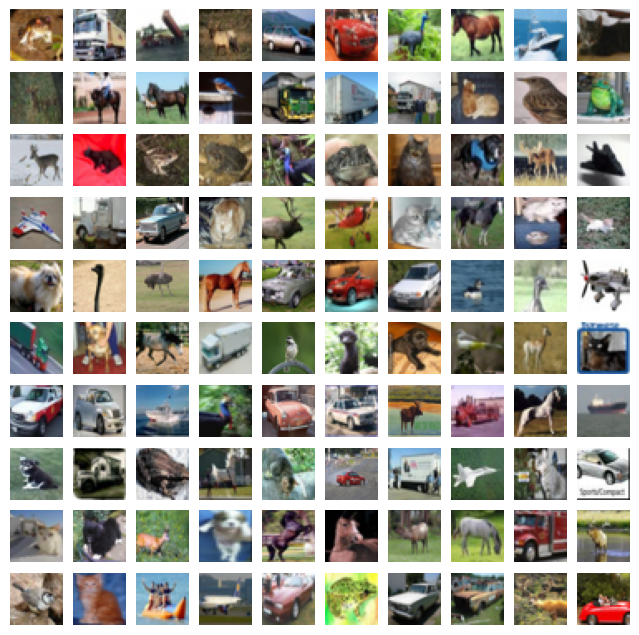

In [16]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis('off')

plt.show()

## Step 4: Create, Train, and Visualize Model

Define the structure of the MLP model, train the model, and visualize training performance metrics.

In [17]:
def create_visualization(visualization_data, title_suffix=""):
    plt.figure(figsize=(15, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(visualization_data['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(visualization_data['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(visualization_data['loss'], label='Training Loss', color='blue')
    plt.plot(visualization_data['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.suptitle(f"Model Training Performance {title_suffix}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Step 5: Train and Evaluate Model Function

Define a function to train and evaluate the model with different hyperparameters.

In [18]:
def train_and_evaluate_model(batch_size, hidden_layer_config, num_epoch, optimizer):

    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    for nodes in hidden_layer_config:
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.summary()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=num_epoch, batch_size=batch_size, verbose=1, validation_split=0.2)

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', accuracy)

    visualization_data = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
    }

    return {
        'optimizer': optimizer,
        'batch_size': batch_size,
        'hidden_layers': str(hidden_layer_config),
        'accuracy': accuracy,
        'loss': loss,
        'val_accuracy_final': history.history['val_accuracy'][-1],
        'val_loss_final': history.history['val_loss'][-1],
        'visualization_data': visualization_data,
    }

## Step 6: Store Results and Iterate with Different Values

Store the results of each model training run and iterate through different hyperparameter values to find the best performing model.

In [19]:
all_results_list = []
optimizers = ['adam', 'sgd', 'rmsprop']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.2666 - loss: 2.0214 - val_accuracy: 0.3441 - val_loss: 1.8042
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3840 - loss: 1.7247 - val_accuracy: 0.3976 - val_loss: 1.6819
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4137 - loss: 1.6309 - val_accuracy: 0.4224 - val_loss: 1.6251
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4295 - loss: 1.5853 - val_accuracy: 0.4357 - val_loss: 1.5903
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4504 - loss: 1.5437 - val_accuracy: 0.4186 - val_loss: 1.6352
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4618 - loss: 1.5067 - val_accuracy: 0.4369 - val_loss: 1.5983
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4730 - loss: 1.4783 - val_accuracy: 0.4425 - val_loss: 1.5660
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4766 -

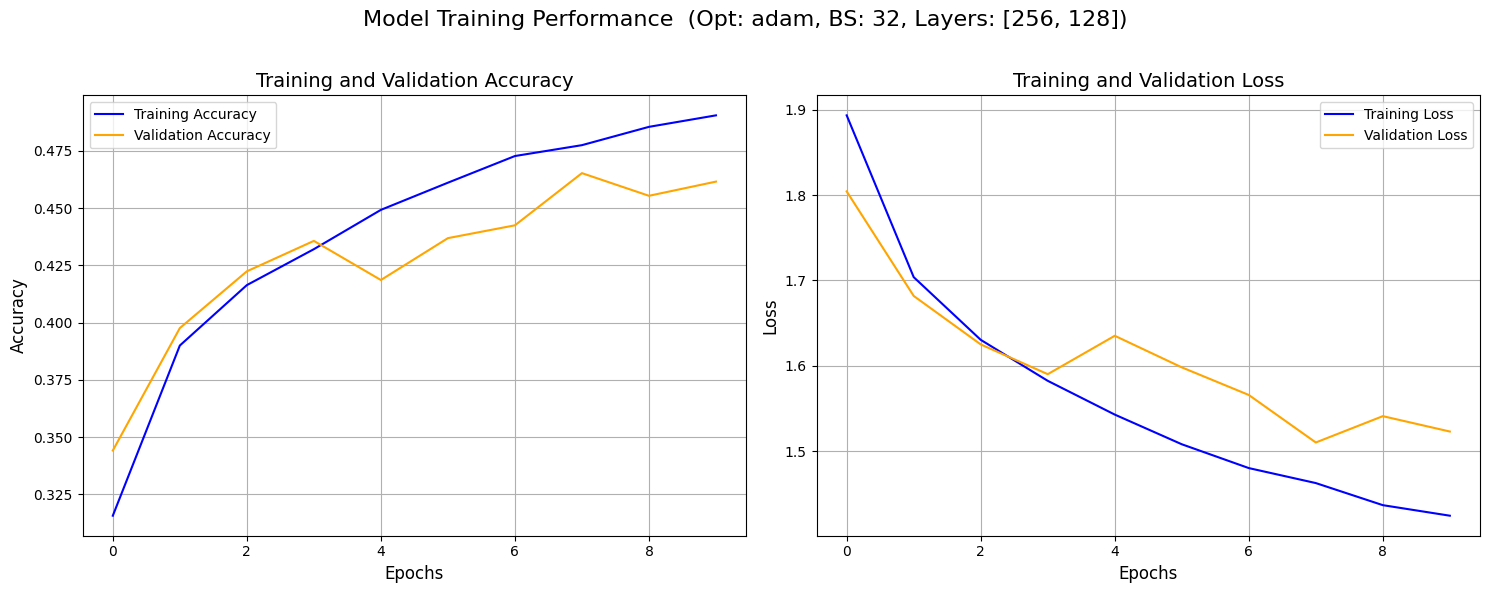

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2606 - loss: 2.0287 - val_accuracy: 0.3594 - val_loss: 1.8019
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3795 - loss: 1.7513 - val_accuracy: 0.3869 - val_loss: 1.7203
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4094 - loss: 1.6609 - val_accuracy: 0.4130 - val_loss: 1.6721
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4351 - loss: 1.5866 - val_accuracy: 0.4370 - val_loss: 1.5945
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4515 - loss: 1.5432 - val_accuracy: 0.4439 - val_loss: 1.5820
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.4652 - loss: 1.5080 - val_accuracy: 0.4567 - val_loss: 1.5485
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4734 - loss: 1.4819 - val_accuracy: 0.4465 - val_loss: 1.5650
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4852 - loss: 1

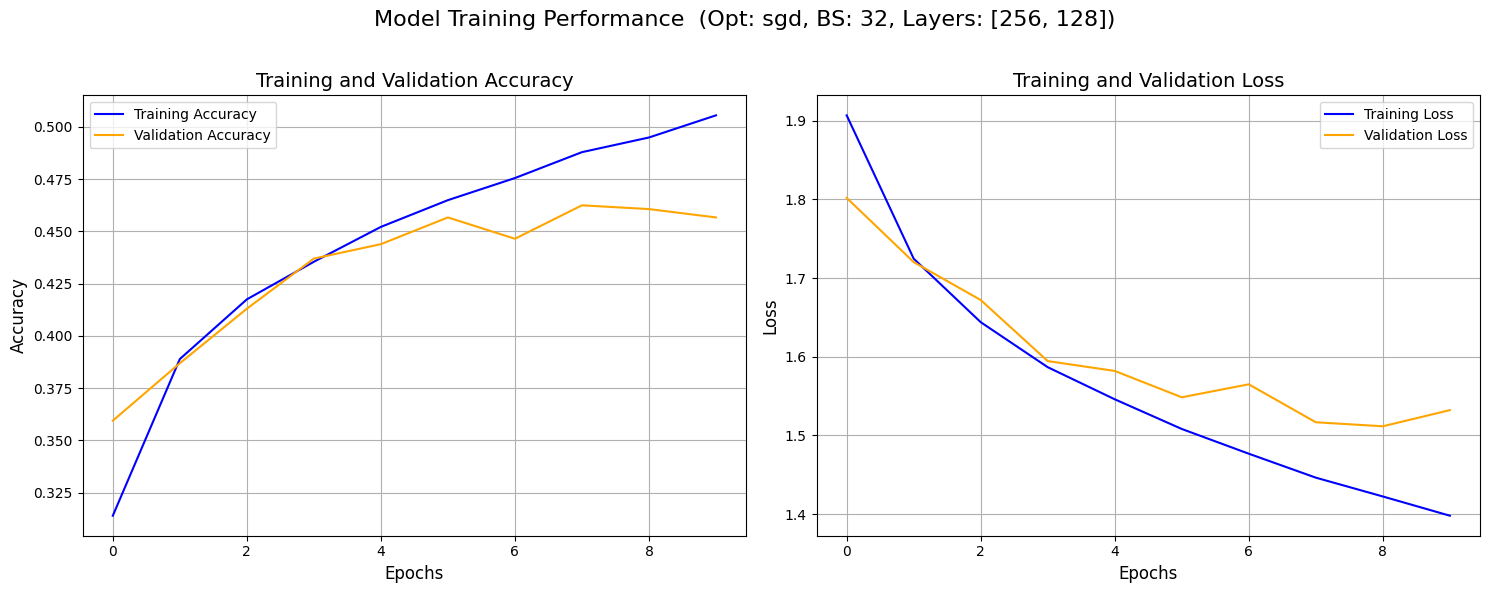

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2470 - loss: 2.1453 - val_accuracy: 0.3662 - val_loss: 1.7635
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3634 - loss: 1.7609 - val_accuracy: 0.3792 - val_loss: 1.7468
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4050 - loss: 1.6614 - val_accuracy: 0.4293 - val_loss: 1.6118
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.4206 - loss: 1.6223 - val_accuracy: 0.4221 - val_loss: 1.6408
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4353 - loss: 1.5788 - val_accuracy: 0.4041 - val_loss: 1.6931
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4452 - loss: 1.5547 - val_accuracy: 0.4220 - val_loss: 1.6658
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4590 - loss: 1.5343 - val_accuracy: 0.4320 - val_loss: 1.6022
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4666 -

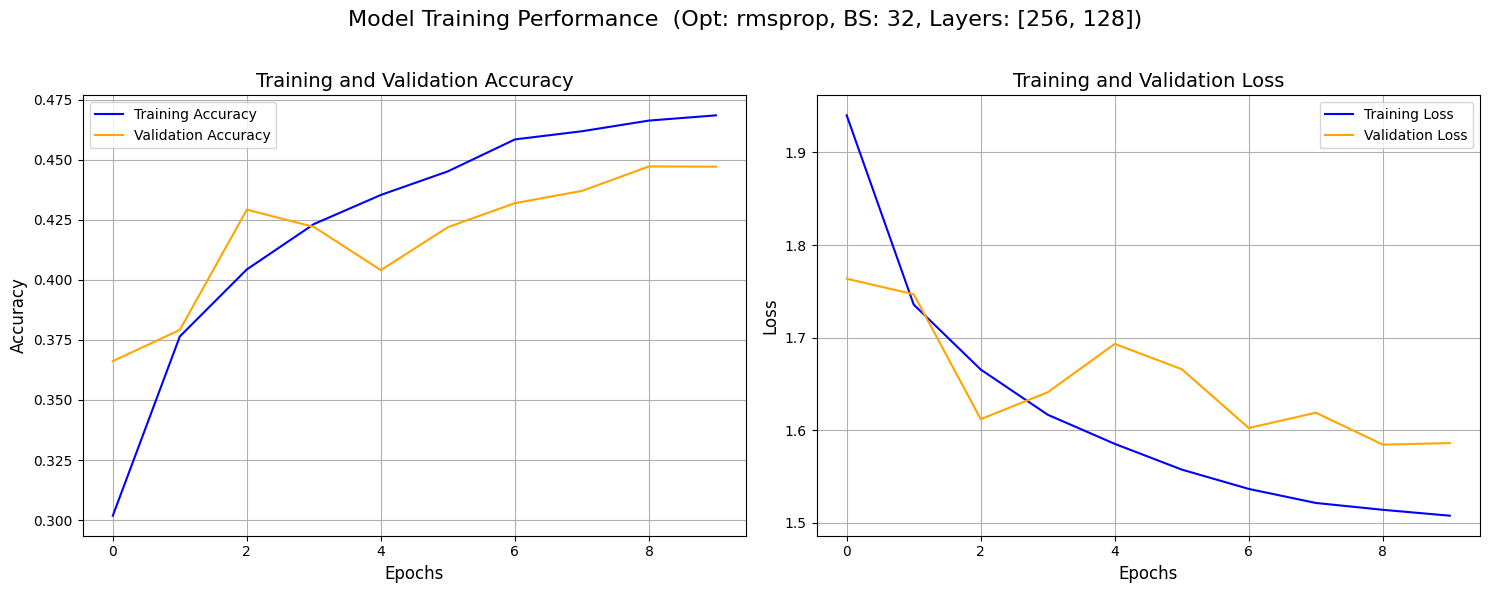


Results for Experiment Set _1:
  optimizer  batch_size hidden_layers  accuracy      loss  val_accuracy_final  val_loss_final
0      adam          32    [256, 128]    0.4695  1.497432              0.4616        1.523169
1       sgd          32    [256, 128]    0.4630  1.497807              0.4567        1.532180
2   rmsprop          32    [256, 128]    0.4540  1.551155              0.4472        1.585877


In [20]:
batch_size_1 = 32
hidden_layer_config_1 = [256, 128]
num_epoch_1 = 10

results_1_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_1, hidden_layer_config_1, num_epoch_1, optimizer)
  results_1_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_1}, Layers: {hidden_layer_config_1})")

results_df_1 = pd.DataFrame(results_1_list)
print("\nResults for Experiment Set _1:")
print(results_df_1[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.2585 - loss: 2.0296 - val_accuracy: 0.3628 - val_loss: 1.7744
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.3819 - loss: 1.7140 - val_accuracy: 0.4072 - val_loss: 1.6580
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.4128 - loss: 1.6275 - val_accuracy: 0.4153 - val_loss: 1.6413
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.4377 - loss: 1.5697 - val_accuracy: 0.4344 - val_loss: 1.5778
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4574 - loss: 1.5179 - val_accuracy: 0.4632 - val_loss: 1.5237
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4653 - loss: 1.4835 - val_accuracy: 0.4365 - val_loss: 1.6055
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.4840 - loss: 1.4402 - val_accuracy: 0.4696 - val_loss: 1.5021
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.4908 - loss: 1.4192 - 

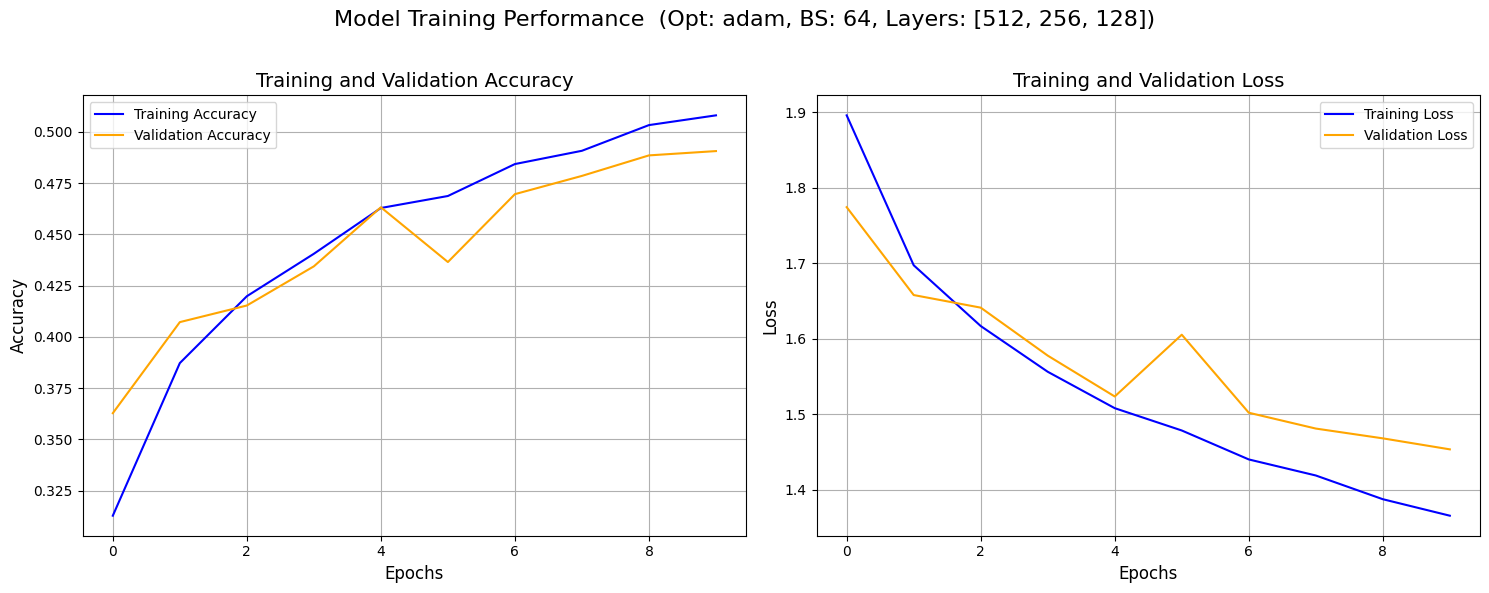

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.2574 - loss: 2.0630 - val_accuracy: 0.3331 - val_loss: 1.8719
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3702 - loss: 1.7767 - val_accuracy: 0.3823 - val_loss: 1.7474
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3997 - loss: 1.6930 - val_accuracy: 0.3976 - val_loss: 1.6954
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.4255 - loss: 1.6281 - val_accuracy: 0.4289 - val_loss: 1.6255
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.4326 - loss: 1.5931 - val_accuracy: 0.4336 - val_loss: 1.5961
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4569 - loss: 1.5408 - val_accuracy: 0.4291 - val_loss: 1.6204
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4606 - loss: 1.5140 - val_accuracy: 0.4416 - val_loss: 1.5859
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4749 - loss: 1.4854 - 

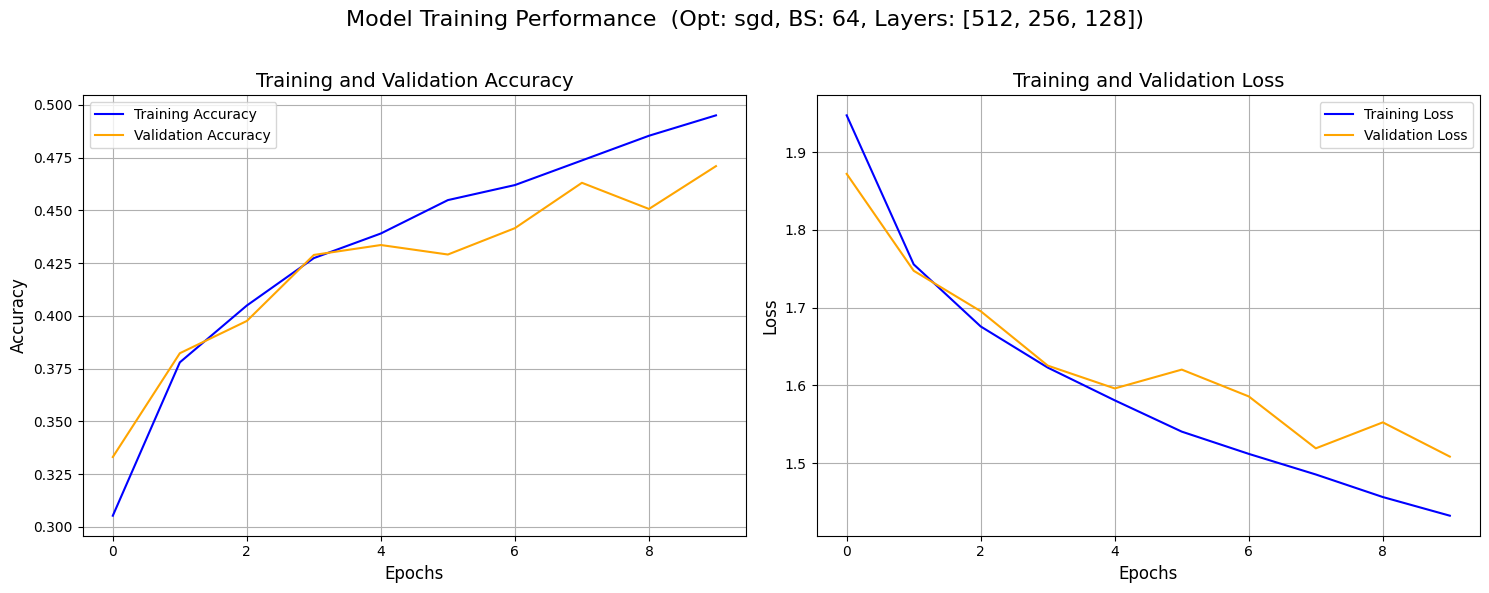

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.2160 - loss: 2.2592 - val_accuracy: 0.3411 - val_loss: 1.8263
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.3531 - loss: 1.7937 - val_accuracy: 0.3749 - val_loss: 1.7301
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3929 - loss: 1.6896 - val_accuracy: 0.4301 - val_loss: 1.6186
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4260 - loss: 1.6014 - val_accuracy: 0.4229 - val_loss: 1.6047
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.4366 - loss: 1.5631 - val_accuracy: 0.4235 - val_loss: 1.6272
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 38ms/step - accuracy: 0.4458 - loss: 1.5349 - val_accuracy: 0.4288 - val_loss: 1.6689
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4653 - loss: 1.4935 - val_accuracy: 0.4267 - val_loss: 1.6678
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4764 - loss: 1.4707 - 

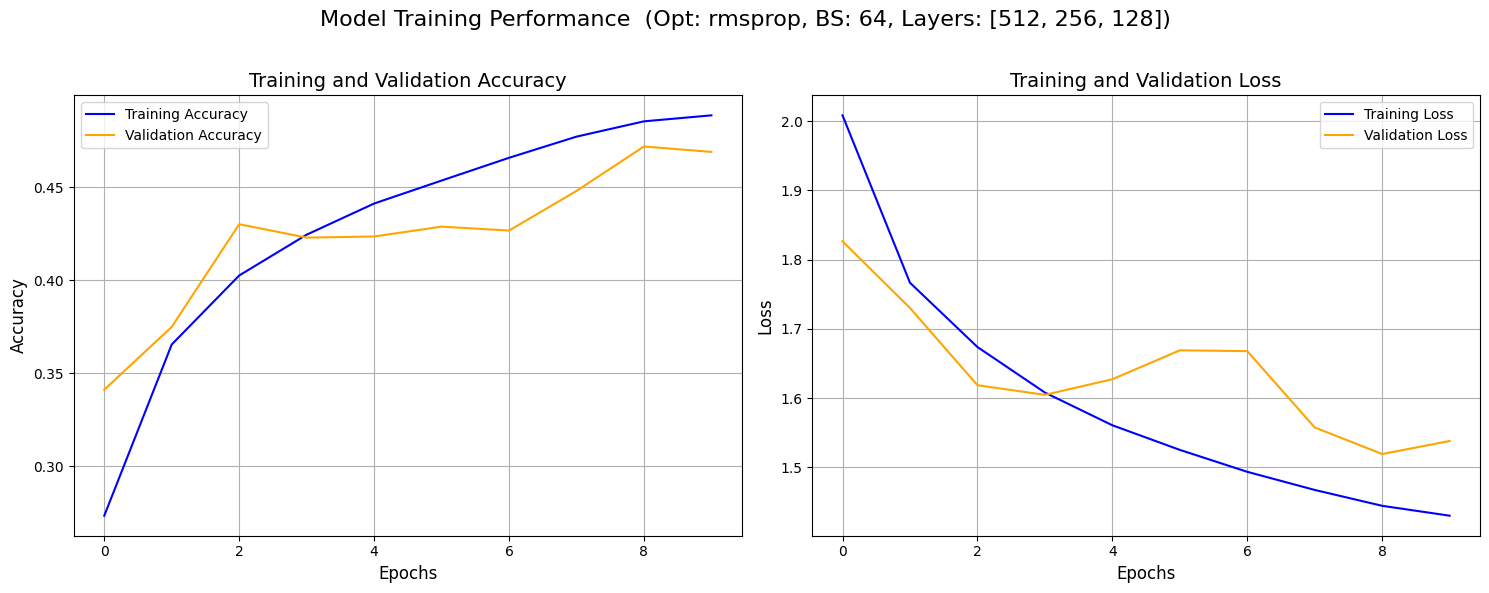


Results for Experiment Set _2:
  optimizer  batch_size    hidden_layers  accuracy      loss  val_accuracy_final  val_loss_final
0      adam          64  [512, 256, 128]    0.4913  1.428527              0.4906        1.453655
1       sgd          64  [512, 256, 128]    0.4721  1.479929              0.4710        1.508499
2   rmsprop          64  [512, 256, 128]    0.4741  1.517384              0.4690        1.538011


In [21]:
batch_size_2 = 64
hidden_layer_config_2 = [512, 256, 128]
num_epoch_2 = 10

results_2_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_2, hidden_layer_config_2, num_epoch_2, optimizer)
  results_2_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_2}, Layers: {hidden_layer_config_2})")

results_df_2 = pd.DataFrame(results_2_list)
print("\nResults for Experiment Set _2:")
print(results_df_2[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,442 (14.67 MB)

 Trainable params: 3,846,442 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.2092 - loss: 2.1287 - val_accuracy: 0.3299 - val_loss: 1.8459
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.3368 - loss: 1.8210 - val_accuracy: 0.3544 - val_loss: 1.7946
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.3723 - loss: 1.7253 - val_accuracy: 0.3878 - val_loss: 1.7065
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4075 - loss: 1.6390 - val_accuracy: 0.4113 - val_loss: 1.6507
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.4360 - loss: 1.5652 - val_accuracy: 0.4247 - val_loss: 1.6184
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.4508 - loss: 1.5311 - val_accuracy: 0.4516 - val_loss: 1.5521
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.4690 - loss: 1.4786 - val_accuracy: 0.4437 - val_loss: 1.5627
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.4816 - loss: 1.447

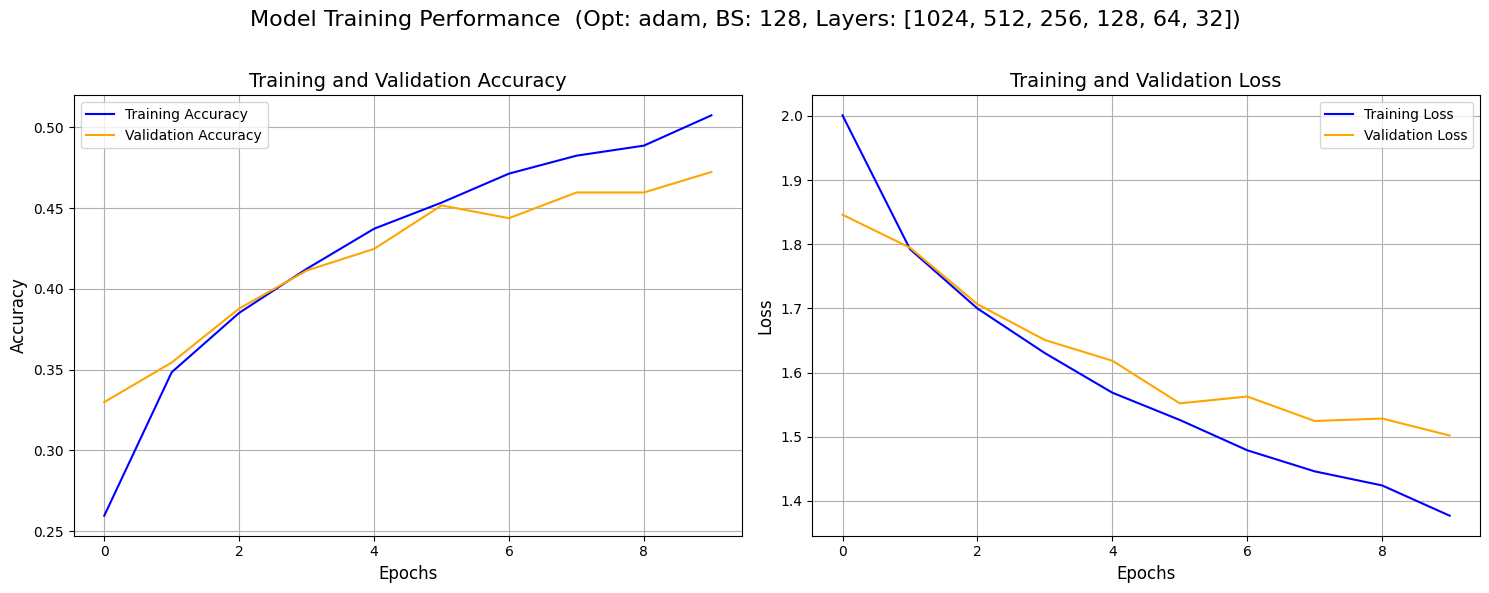

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,442 (14.67 MB)

 Trainable params: 3,846,442 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.1758 - loss: 2.2186 - val_accuracy: 0.1804 - val_loss: 2.1810
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.2941 - loss: 1.9721 - val_accuracy: 0.3097 - val_loss: 1.9030
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.3405 - loss: 1.8538 - val_accuracy: 0.3527 - val_loss: 1.8005
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.3701 - loss: 1.7713 - val_accuracy: 0.3655 - val_loss: 1.7806
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.3840 - loss: 1.7215 - val_accuracy: 0.3623 - val_loss: 1.7608
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.3979 - loss: 1.6739 - val_accuracy: 0.4085 - val_loss: 1.6680
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.4158 - loss: 1.6335 - val_accuracy: 0.4140 - val_loss: 1.6478
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.4255 - loss: 1.6014 - 

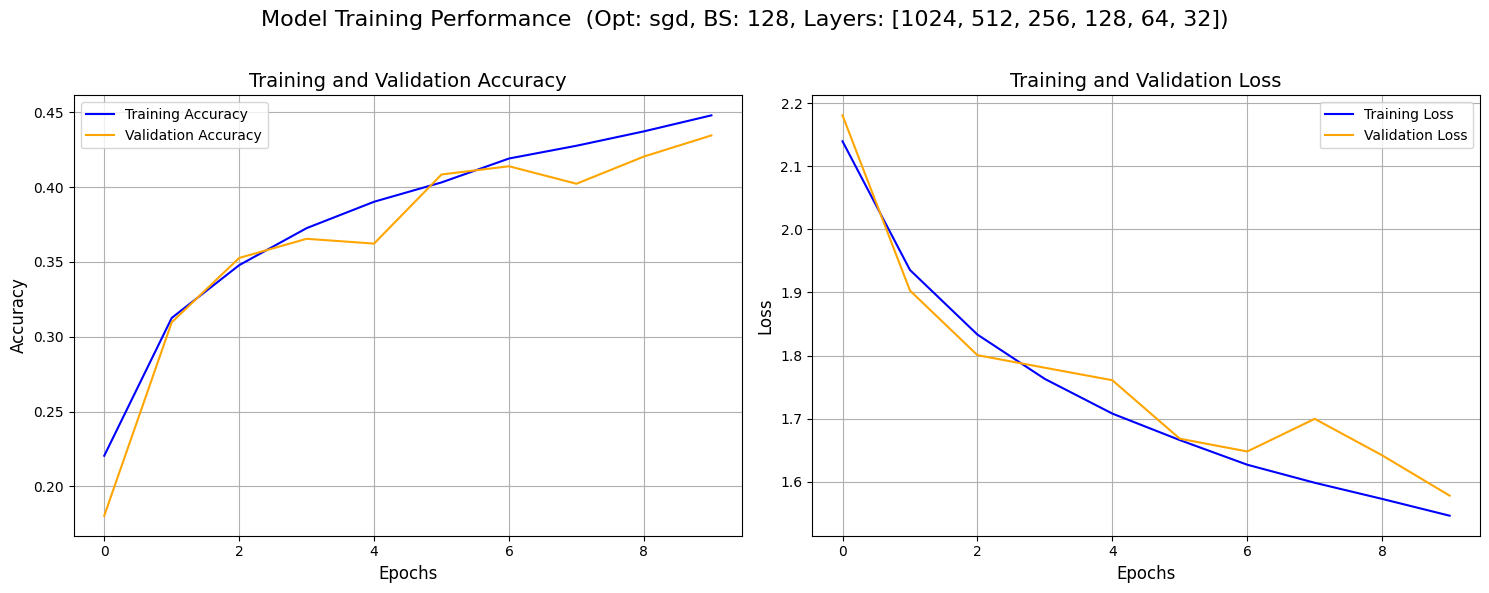

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,442 (14.67 MB)

 Trainable params: 3,846,442 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.1550 - loss: 2.2705 - val_accuracy: 0.2789 - val_loss: 1.9671
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.2969 - loss: 1.9282 - val_accuracy: 0.3393 - val_loss: 1.8305
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.3441 - loss: 1.8141 - val_accuracy: 0.3518 - val_loss: 1.7946
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.3727 - loss: 1.7394 - val_accuracy: 0.3772 - val_loss: 1.7210
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.4001 - loss: 1.6911 - val_accuracy: 0.3830 - val_loss: 1.7471
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.4141 - loss: 1.6420 - val_accuracy: 0.3847 - val_loss: 1.7201
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.4231 - loss: 1.6078 - val_accuracy: 0.4166 - val_loss: 1.6395
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.4403 - loss: 1.5668 -

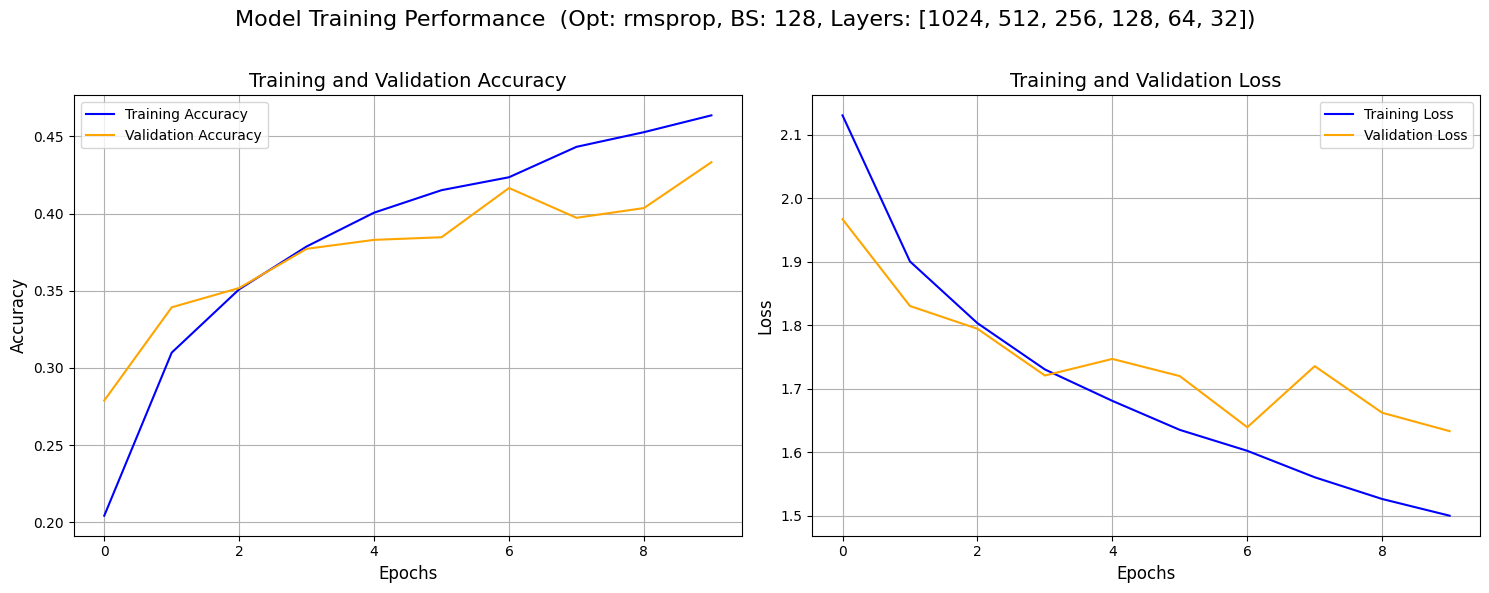


Results for Experiment Set _3:
  optimizer  batch_size                  hidden_layers  accuracy      loss  val_accuracy_final  val_loss_final
0      adam         128  [1024, 512, 256, 128, 64, 32]    0.4824  1.463653              0.4723        1.501959
1       sgd         128  [1024, 512, 256, 128, 64, 32]    0.4407  1.547698              0.4346        1.577672
2   rmsprop         128  [1024, 512, 256, 128, 64, 32]    0.4390  1.602028              0.4333        1.633387


In [22]:
batch_size_3 = 128
hidden_layer_config_3 = [1024, 512, 256, 128, 64, 32]
num_epoch_3 = 10

results_3_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_3, hidden_layer_config_3, num_epoch_3, optimizer)
  results_3_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_3}, Layers: {hidden_layer_config_3})")

results_df_3 = pd.DataFrame(results_3_list)
print("\nResults for Experiment Set _3:")
print(results_df_3[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,442 (14.67 MB)

 Trainable params: 3,846,442 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.1743 - loss: 2.1757 - val_accuracy: 0.2909 - val_loss: 1.9638
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.3196 - loss: 1.8667 - val_accuracy: 0.3515 - val_loss: 1.7915
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.3676 - loss: 1.7532 - val_accuracy: 0.3842 - val_loss: 1.7153
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.3980 - loss: 1.6643 - val_accuracy: 0.4030 - val_loss: 1.6666
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.4156 - loss: 1.6250 - val_accuracy: 0.4099 - val_loss: 1.6697
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 154ms/step - accuracy: 0.4385 - loss: 1.5695 - val_accuracy: 0.4360 - val_loss: 1.6240
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.4522 - loss: 1.5342 - val_accuracy: 0.4530 - val_loss: 1.5554
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.4629 - loss: 1

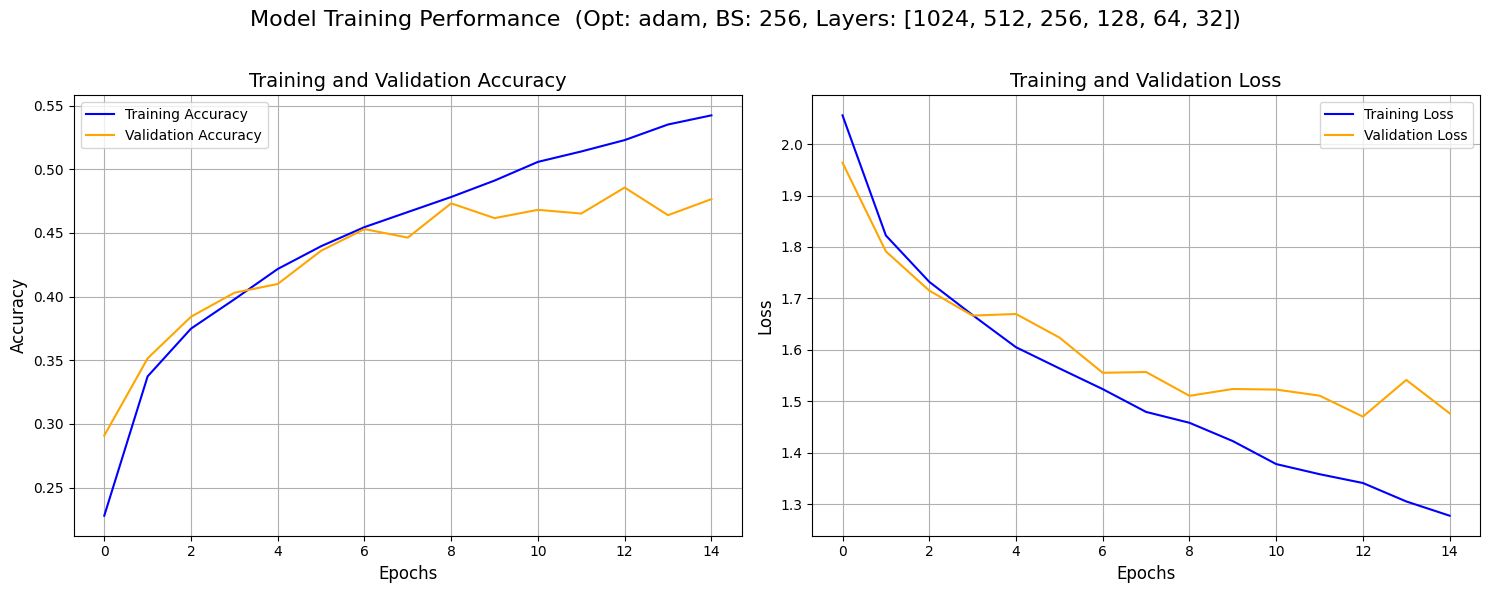

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_28 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,442 (14.67 MB)

 Trainable params: 3,846,442 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.1872 - loss: 2.2611 - val_accuracy: 0.2477 - val_loss: 2.1264
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.2660 - loss: 2.0789 - val_accuracy: 0.2500 - val_loss: 2.0513
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.2970 - loss: 1.9547 - val_accuracy: 0.2882 - val_loss: 1.9733
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.3261 - loss: 1.8803 - val_accuracy: 0.2822 - val_loss: 1.9884
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.3445 - loss: 1.8364 - val_accuracy: 0.3622 - val_loss: 1.8061
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.3635 - loss: 1.7820 - val_accuracy: 0.3520 - val_loss: 1.8147
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.3690 - loss: 1.7610 - val_accuracy: 0.3560 - val_loss: 1.7802
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.3832 - loss: 1

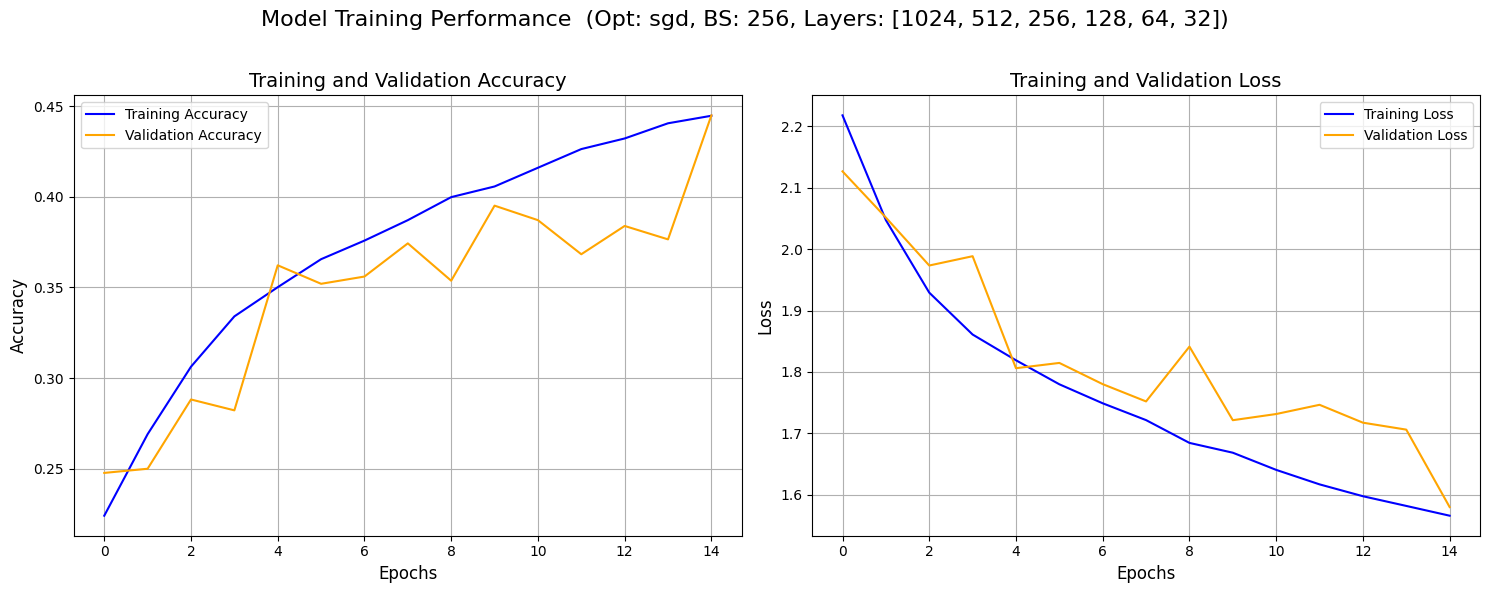

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,846,442 (14.67 MB)

 Trainable params: 3,846,442 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.1248 - loss: 2.4528 - val_accuracy: 0.2281 - val_loss: 2.0596
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.2481 - loss: 2.0369 - val_accuracy: 0.2439 - val_loss: 2.0410
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.3013 - loss: 1.9226 - val_accuracy: 0.2934 - val_loss: 1.9375
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.3344 - loss: 1.8394 - val_accuracy: 0.2802 - val_loss: 2.0286
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.3481 - loss: 1.8002 - val_accuracy: 0.3647 - val_loss: 1.7669
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 149ms/step - accuracy: 0.3727 - loss: 1.7407 - val_accuracy: 0.3461 - val_loss: 1.8379
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.3937 - loss: 1.7001 - val_accuracy: 0.3755 - val_loss: 1.7740
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.4106 - loss: 1

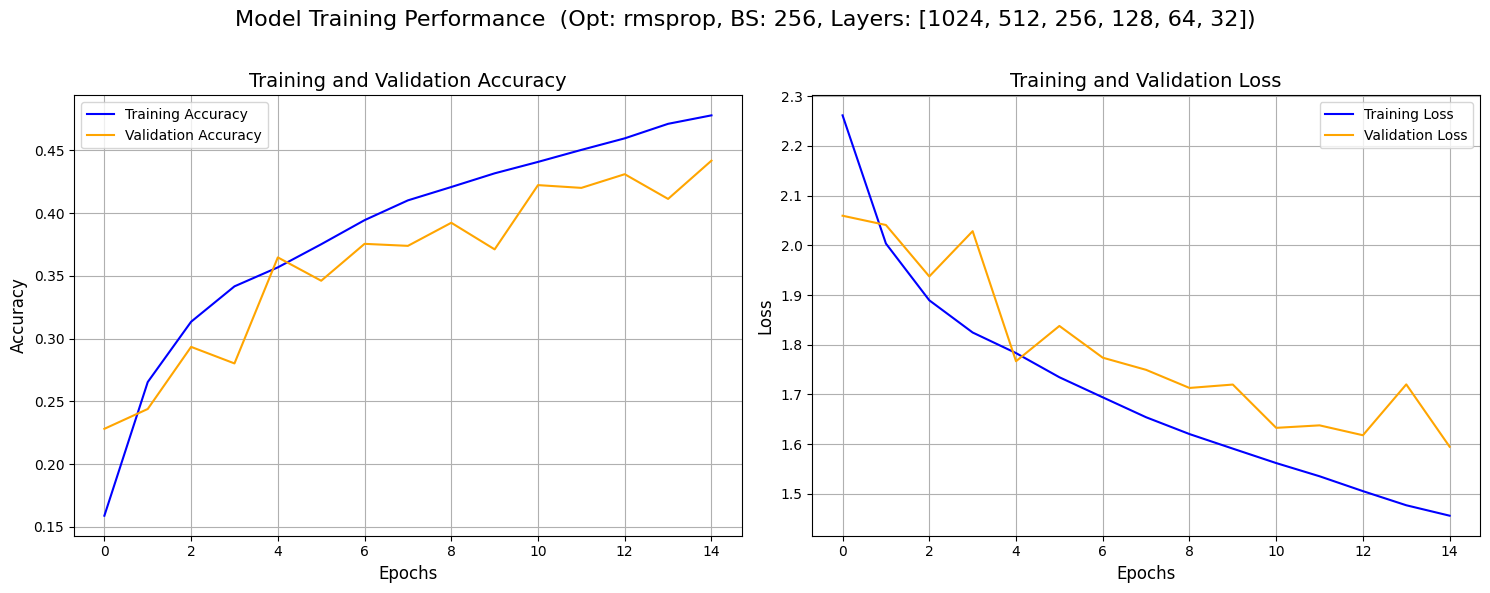


Results for Experiment Set _4:
  optimizer  batch_size                  hidden_layers  accuracy      loss  val_accuracy_final  val_loss_final
0      adam         256  [1024, 512, 256, 128, 64, 32]    0.4898  1.440874              0.4765        1.476504
1       sgd         256  [1024, 512, 256, 128, 64, 32]    0.4552  1.556678              0.4449        1.580163
2   rmsprop         256  [1024, 512, 256, 128, 64, 32]    0.4484  1.575566              0.4418        1.594854


In [25]:
batch_size_4 = 256
hidden_layer_config_4 = [1024, 512, 256, 128, 64, 32]
num_epoch_4 = 15

results_4_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_4, hidden_layer_config_4, num_epoch_4, optimizer)
  results_4_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_4}, Layers: {hidden_layer_config_4})")

results_df_4 = pd.DataFrame(results_4_list)
print("\nResults for Experiment Set _4:")
print(results_df_4[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 246)            │       126,198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 128)            │        31,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,830,656 (14.61 MB)

 Trainable params: 3,830,656 (14.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.2353 - loss: 2.1305 - val_accuracy: 0.3550 - val_loss: 1.8062
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.3757 - loss: 1.7329 - val_accuracy: 0.3946 - val_loss: 1.7031
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4089 - loss: 1.6461 - val_accuracy: 0.4297 - val_loss: 1.5930
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.4380 - loss: 1.5693 - val_accuracy: 0.4480 - val_loss: 1.5577
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.4590 - loss: 1.5214 - val_accuracy: 0.4428 - val_loss: 1.5478
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.4723 - loss: 1.4727 - val_accuracy: 0.4443 - val_loss: 1.5612
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.4919 - loss: 1.4214 - val_accuracy: 0.4767 - val_loss: 1.4884
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.5018 - loss: 1.3

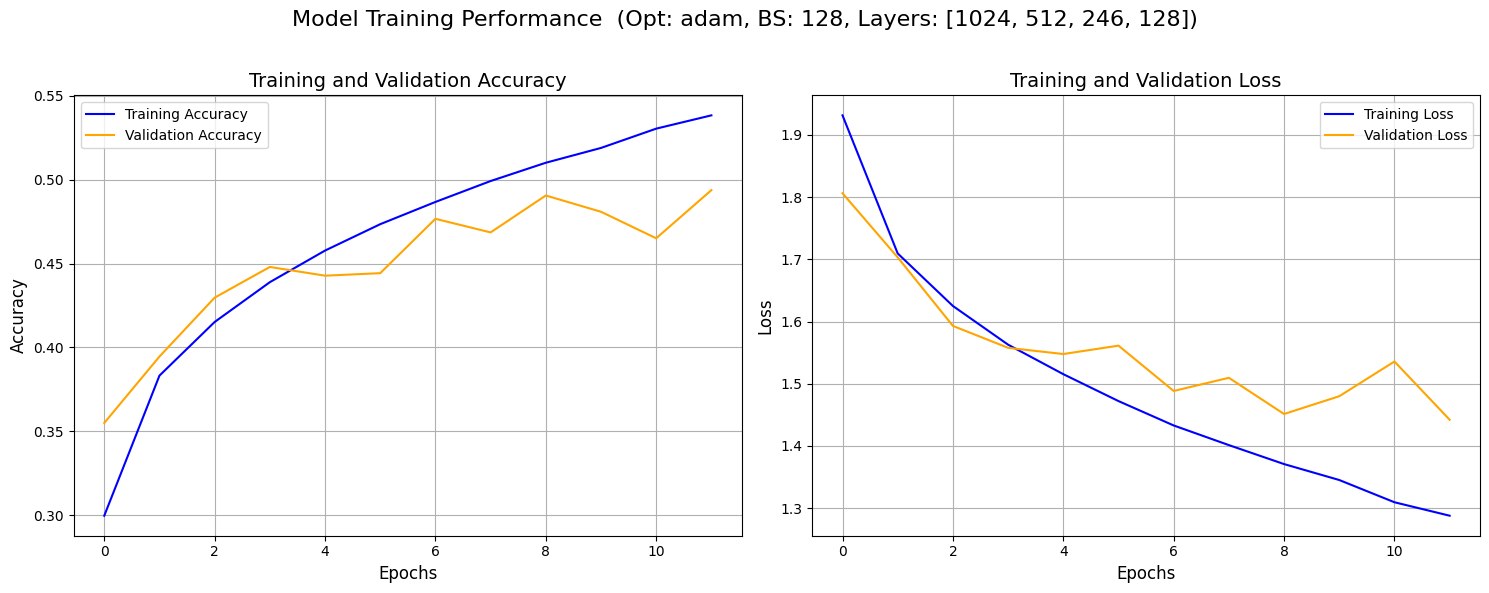

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 246)            │       126,198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │        31,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,830,656 (14.61 MB)

 Trainable params: 3,830,656 (14.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - accuracy: 0.2278 - loss: 2.1307 - val_accuracy: 0.3265 - val_loss: 1.9073
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.3452 - loss: 1.8471 - val_accuracy: 0.3522 - val_loss: 1.8242
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.3743 - loss: 1.7659 - val_accuracy: 0.3448 - val_loss: 1.8466
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.4016 - loss: 1.6994 - val_accuracy: 0.3608 - val_loss: 1.7884
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.4144 - loss: 1.6536 - val_accuracy: 0.3844 - val_loss: 1.7080
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.4282 - loss: 1.6136 - val_accuracy: 0.4218 - val_loss: 1.6346
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.4410 - loss: 1.5885 - val_accuracy: 0.4237 - val_loss: 1.6193
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.4527 - loss: 1.5545 - 

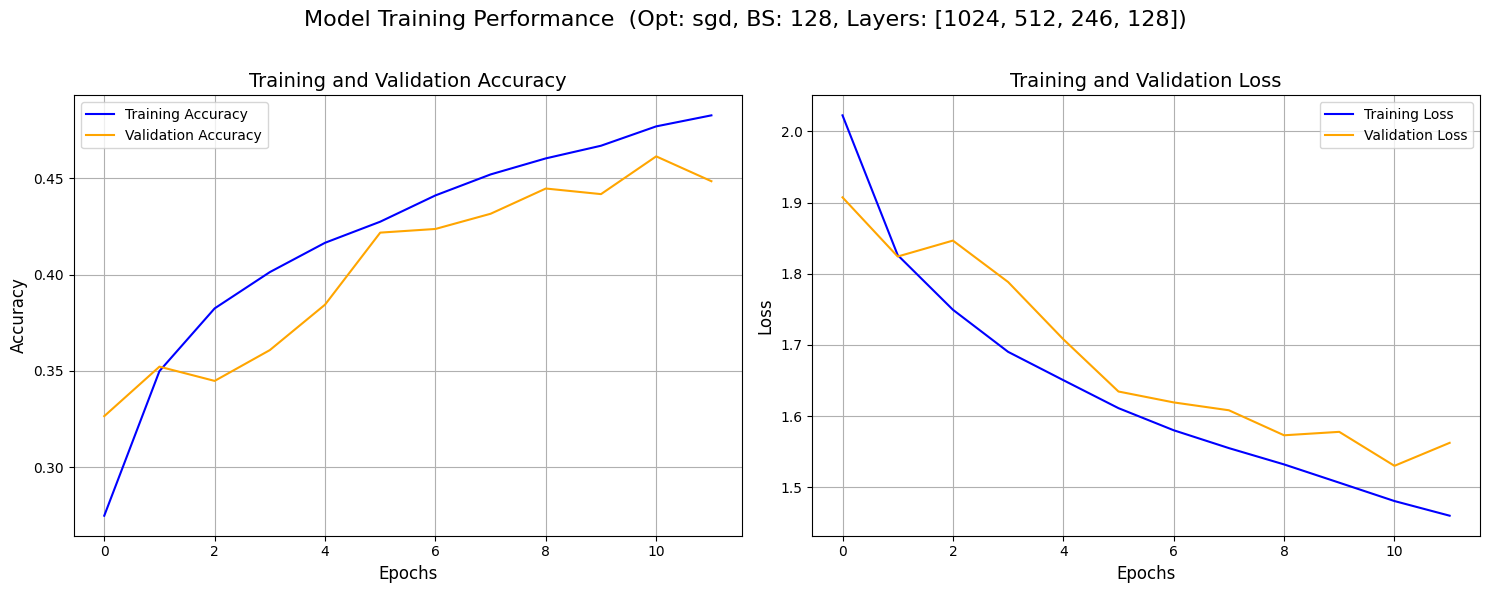

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 246)            │       126,198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 128)            │        31,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,830,656 (14.61 MB)

 Trainable params: 3,830,656 (14.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.1832 - loss: 2.4010 - val_accuracy: 0.3030 - val_loss: 1.9032
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.3218 - loss: 1.8703 - val_accuracy: 0.3572 - val_loss: 1.8004
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.3607 - loss: 1.7766 - val_accuracy: 0.3240 - val_loss: 1.8689
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.3839 - loss: 1.7095 - val_accuracy: 0.4028 - val_loss: 1.6666
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.4151 - loss: 1.6366 - val_accuracy: 0.3957 - val_loss: 1.6803
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.4276 - loss: 1.5873 - val_accuracy: 0.4124 - val_loss: 1.6539
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.4519 - loss: 1.5425 - val_accuracy: 0.4370 - val_loss: 1.5971
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.4535 - loss: 1.5114 

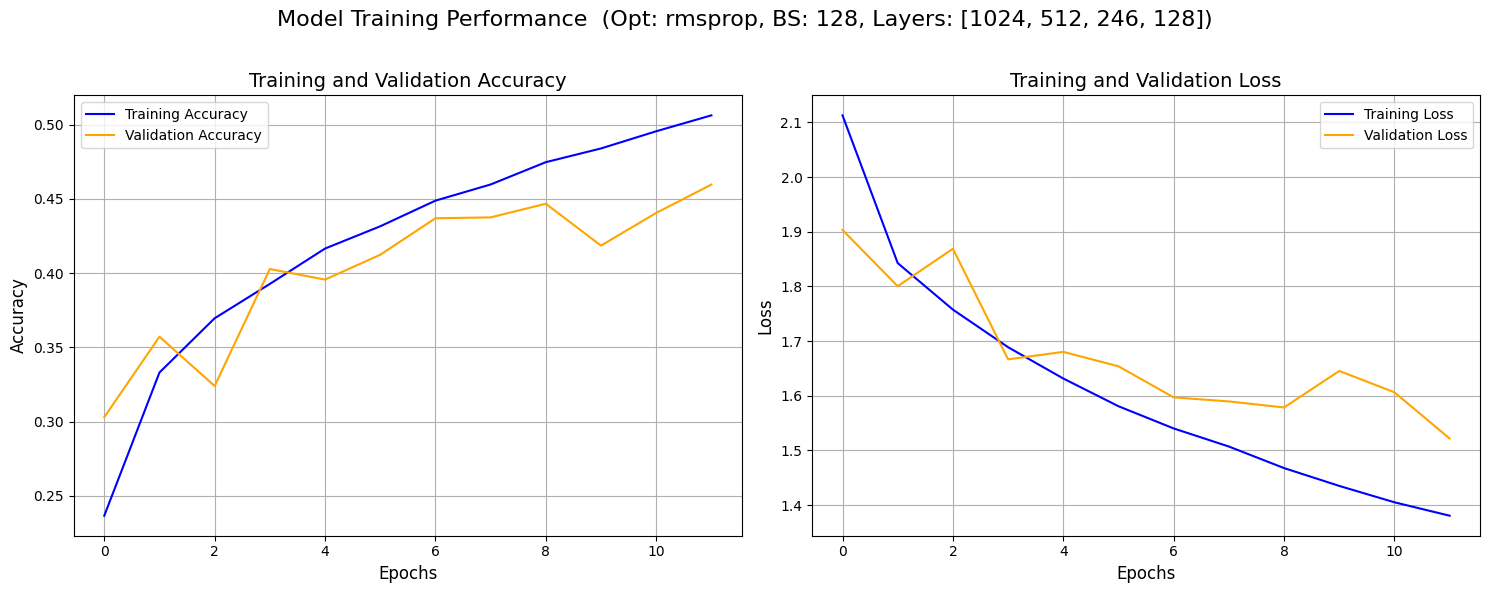


Results for Experiment Set _5:
  optimizer  batch_size          hidden_layers  accuracy      loss  val_accuracy_final  val_loss_final
0      adam         128  [1024, 512, 246, 128]    0.5016  1.418416              0.4938        1.442184
1       sgd         128  [1024, 512, 246, 128]    0.4528  1.528440              0.4485        1.562497
2   rmsprop         128  [1024, 512, 246, 128]    0.4687  1.506107              0.4597        1.521795


In [23]:
batch_size_5 = 128
hidden_layer_config_5 = [1024, 512, 246, 128]
num_epoch_5 = 12

results_5_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_5, hidden_layer_config_5, num_epoch_5, optimizer)
  results_5_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_5}, Layers: {hidden_layer_config_5})")

results_df_5 = pd.DataFrame(results_5_list)
print("\nResults for Experiment Set _5:")
print(results_df_5[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_5)

## Step 7: Final Results Displayed

Display the final results, including the best performing model and its corresponding hyperparameters, along with visualizations of the training and validation metrics.

In [ ]:
if all_results_list:
    final_combined_df = pd.concat(all_results_list, ignore_index=True)
    print("Final Results")
    print(final_combined_df)

## Step 8: Best Peformance Display in detail


Overall Best Performing Result:
  optimizer  batch_size          hidden_layers  accuracy      loss  val_accuracy_final  val_loss_final
0      adam         128  [1024, 512, 246, 128]    0.5016  1.418416              0.4938        1.442184


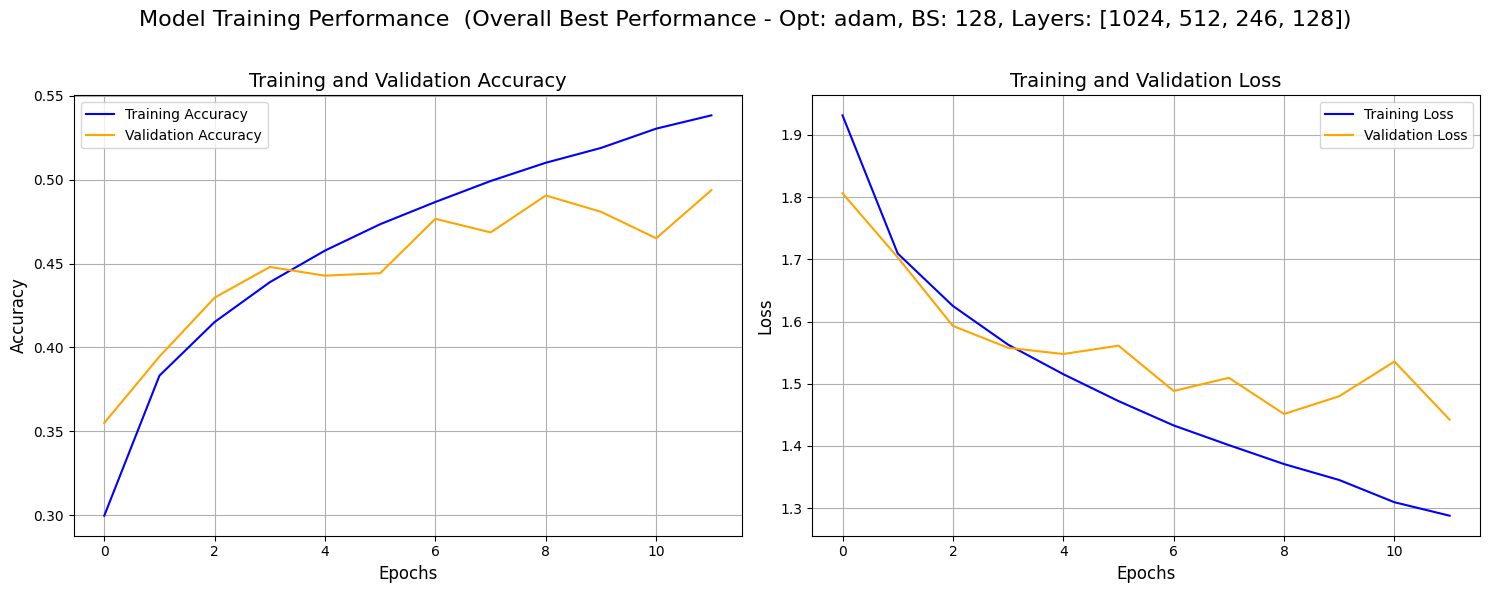

In [24]:
all_individual_results = [item for sublist in all_results_list for item in sublist.to_dict('records')]

# Find the best result based on accuracy
overall_best_result = max(all_individual_results, key=lambda x: x['accuracy'])

print("\nOverall Best Performing Result:")
print(pd.DataFrame([overall_best_result])[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])

create_visualization(overall_best_result['visualization_data'], title_suffix=f" (Overall Best Performance - Opt: {overall_best_result['optimizer']}, BS: {overall_best_result['batch_size']}, Layers: {overall_best_result['hidden_layers']})")

## Conclusion

The MLP model achieved a maximum accuracy of **0.5016** on the CIFAR-10 dataset with the tested hyperparameter combinations. This is likely due to the limitations of MLPs in effectively processing image data.

**Parameters for the Best Performing Model:**
- **Optimization Method:** Adam
- **Batch Size:** 128
- **Hidden Layers:** [1024, 512, 246, 128]
- **Number of Epochs:** 12

**Observations from Experiments:**

The experiments suggest that different combinations of batch size, hidden layer configurations, number of epochs, and optimization methods influence the model's performance.

**Recommendation:** Explore Convolutional Neural Networks (CNNs) and employ data augmentation and hyperparameter tuning for potentially improved performance on image classification tasks.

## Compiled Code (Run for Final Execution)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

fig, axes = plt.subplots(10, 10, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis('off')

plt.show()

def create_visualization(visualization_data, title_suffix=""):
    plt.figure(figsize=(15, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(visualization_data['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(visualization_data['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(visualization_data['loss'], label='Training Loss', color='blue')
    plt.plot(visualization_data['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.suptitle(f"Model Training Performance {title_suffix}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def train_and_evaluate_model(batch_size, hidden_layer_config, num_epoch, optimizer):

    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    for nodes in hidden_layer_config:
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.summary()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=num_epoch, batch_size=batch_size, verbose=1, validation_split=0.2)

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', accuracy)

    visualization_data = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
    }

    return {
        'optimizer': optimizer,
        'batch_size': batch_size,
        'hidden_layers': str(hidden_layer_config),
        'accuracy': accuracy,
        'loss': loss,
        'val_accuracy_final': history.history['val_accuracy'][-1],
        'val_loss_final': history.history['val_loss'][-1],
        'visualization_data': visualization_data,
    }

all_results_list = []
optimizers = ['adam', 'sgd', 'rmsprop']

batch_size_1 = 32
hidden_layer_config_1 = [256, 128]
num_epoch_1 = 10

results_1_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_1, hidden_layer_config_1, num_epoch_1, optimizer)
  results_1_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_1}, Layers: {hidden_layer_config_1})")

results_df_1 = pd.DataFrame(results_1_list)
print("\nResults for Experiment Set _1:")
print(results_df_1[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_1)


batch_size_2 = 64
hidden_layer_config_2 = [512, 256, 128]
num_epoch_2 = 10

results_2_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_2, hidden_layer_config_2, num_epoch_2, optimizer)
  results_2_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_2}, Layers: {hidden_layer_config_2})")

results_df_2 = pd.DataFrame(results_2_list)
print("\nResults for Experiment Set _2:")
print(results_df_2[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_2)


batch_size_3 = 128
hidden_layer_config_3 = [1024, 512, 256, 128, 64, 32]
num_epoch_3 = 10

results_3_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_3, hidden_layer_config_3, num_epoch_3, optimizer)
  results_3_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_3}, Layers: {hidden_layer_config_3})")

results_df_3 = pd.DataFrame(results_3_list)
print("\nResults for Experiment Set _3:")
print(results_df_3[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_3)


batch_size_4 = 256
hidden_layer_config_4 = [1024, 512, 256, 128, 64, 32]
num_epoch_4 = 15

results_4_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_4, hidden_layer_config_4, num_epoch_4, optimizer)
  results_4_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_4}, Layers: {hidden_layer_config_4})")

results_df_4 = pd.DataFrame(results_4_list)
print("\nResults for Experiment Set _4:")
print(results_df_4[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_4)


batch_size_5 = 128
hidden_layer_config_5 = [1024, 512, 246, 128]
num_epoch_5 = 12

results_5_list = []
for optimizer in optimizers:
  result = train_and_evaluate_model(batch_size_5, hidden_layer_config_5, num_epoch_5, optimizer)
  results_5_list.append(result)
  create_visualization(result['visualization_data'], title_suffix=f" (Opt: {optimizer}, BS: {batch_size_5}, Layers: {hidden_layer_config_5})")

results_df_5 = pd.DataFrame(results_5_list)
print("\nResults for Experiment Set _5:")
print(results_df_5[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])
all_results_list.append(results_df_5)


if all_results_list:
    final_combined_df = pd.concat(all_results_list, ignore_index=True)
    print("Final Results")
    print(final_combined_df)


all_individual_results = [item for sublist in all_results_list for item in sublist.to_dict('records')]

# Find the best result based on accuracy
overall_best_result = max(all_individual_results, key=lambda x: x['accuracy'])

print("\nOverall Best Performing Result:")
print(pd.DataFrame([overall_best_result])[['optimizer', 'batch_size', 'hidden_layers', 'accuracy', 'loss', 'val_accuracy_final', 'val_loss_final']])

create_visualization(overall_best_result['visualization_data'], title_suffix=f" (Overall Best Performance - Opt: {overall_best_result['optimizer']}, BS: {overall_best_result['batch_size']}, Layers: {overall_best_result['hidden_layers']})")